<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Basic_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text classification with movie reviews

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.13.1


In [0]:
# Hack
import numpy as np
old = np.load

np.load = lambda *a,**k: old(*a, allow_pickle=True, **k)

In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [10]:
train_data.shape

(25000,)

In [12]:
print(train_data[0][:20])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


In [13]:
len(train_data[0]), len(train_data[1]) # Each training set is different 

(218, 189)

In [23]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

Code to Convert Numbers Back to Text

In [14]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [16]:
decode_review(train_data[0][:20])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you"

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256
                                                       )

In [0]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256
                                                     )

In [21]:
len(train_data[0]), len(train_data[1]) # Same Size

(256, 256)

In [22]:
print(train_data[0][:20])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25]


In [24]:
vocab_size = 10000 # input shape is the vocabulary count used for the movie reviews (10,000 words)
model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16))
#This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. 
# These vectors are learned as the model trains.

model.add(keras.layers.GlobalAveragePooling1D())
#GlobalAveragePooling1D layer returns a fixed-length output vector for each example by 
# averaging over the sequence dimension.

model.add(keras.layers.Dense(16, activation=tf.nn.relu))

model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()
#The above model has two intermediate or "hidden" layers, between the input and output.

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Create a Validation Set

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [27]:
history = model.fit(
    
    partial_x_train,
    partial_y_train,
    epochs = 50,
    batch_size = 500,
    validation_data = (x_val, y_val),
    verbose=1
)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6918 - acc: 0.6060 - val_loss: 0.6897 - val_acc: 0.6242
Epoch 2/50
15000/15000 [==============================] - 0s 12us/sample - loss: 0.6850 - acc: 0.6754 - val_loss: 0.6804 - val_acc: 0.7188
Epoch 3/50
15000/15000 [==============================] - 0s 11us/sample - loss: 0.6710 - acc: 0.7387 - val_loss: 0.6636 - val_acc: 0.7466
Epoch 4/50
15000/15000 [==============================] - 0s 11us/sample - loss: 0.6474 - acc: 0.7588 - val_loss: 0.6368 - val_acc: 0.7609
Epoch 5/50
15000/15000 [==============================] - 0s 11us/sample - loss: 0.6126 - acc: 0.7865 - val_loss: 0.6007 - val_acc: 0.7827
Epoch 6/50
15000/15000 [==============================] - 0s 11us/sample - loss: 0.5688 - acc: 0.8089 - val_loss: 0.5587 - val_acc: 0.8008
Epoch 7/50
15000/15000 [==============================] - 0s 11us/sa

In [28]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 43us/sample - loss: 0.3822 - acc: 0.8659


In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

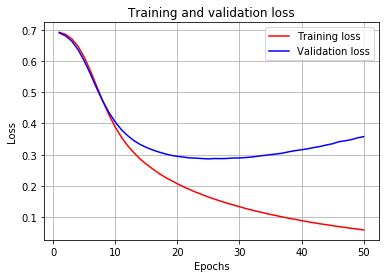

In [32]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

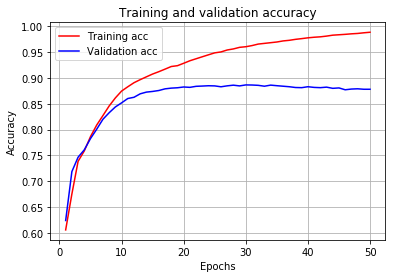

In [33]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()